In [1]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.6 MB/s 


# **Import Library**

In [2]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score as f1
from sklearn .metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Aspek Harga**

In [4]:
tweet_harga = pd.read_csv('/content/drive/MyDrive/Dataset TA/aspek_harga.csv')
tweet_harga.shape

(5000, 3)

In [5]:
tweet_harga['label'].value_counts()

-1    3517
 0    1460
 1      23
Name: label, dtype: int64

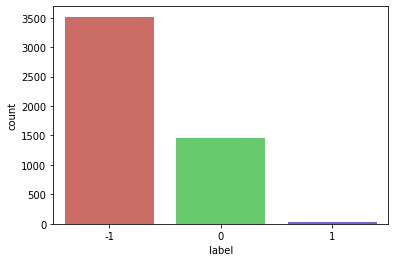

In [6]:
harga = sns.countplot(tweet_harga['label'], palette = 'hls')
plt.show()

In [7]:
tweet_harga.isna().sum()

tweet       0
stemming    0
label       0
dtype: int64

## Inisialisasi Data

In [8]:
x_harga = tweet_harga['stemming']
y_harga = tweet_harga['label'].values

## Split Data



In [9]:
from sklearn.model_selection import train_test_split
x_harga_train, x_harga_test, y_harga_train, y_harga_test = train_test_split(
    tweet_harga['stemming'], 
    tweet_harga['label'], 
    test_size=0.2)

train_df = pd.DataFrame()
train_df['tweet'] = x_harga_train
train_df['sentiment'] = y_harga_train
test_df = pd.DataFrame()
test_df['tweet'] = x_harga_test
test_df['sentiment'] = y_harga_test

## Feature TF-IDF

In [10]:
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_harga_train)
x_harga_train_vectorized = tfidf_vect.transform(x_harga_train)
x_harga_test_vectorized = tfidf_vect.transform(x_harga_test)

In [11]:
print (x_harga_train_vectorized)

  (0, 2566)	0.22936393155034293
  (0, 2083)	0.5032543034793885
  (0, 1961)	0.3610315723450422
  (0, 1472)	0.3303484945465283
  (0, 1241)	0.3610315723450422
  (0, 1121)	0.06793838061818183
  (0, 853)	0.5154840425232312
  (0, 395)	0.1645207918549934
  (0, 239)	0.09375786508825215
  (0, 206)	0.10008621706260881
  (0, 171)	0.08997372895852801
  (1, 2532)	0.15369039166840937
  (1, 1541)	0.15381193728447853
  (1, 1529)	0.3498597908362902
  (1, 1272)	0.17905344936414894
  (1, 1121)	0.11438495343979424
  (1, 984)	0.15413669990663462
  (1, 585)	0.25102608685002614
  (1, 450)	0.7788531754581206
  (1, 171)	0.30296985898341
  (2, 2566)	0.3223479543853412
  (2, 2532)	0.12828999927075962
  (2, 1541)	0.12839145705759722
  (2, 1355)	0.22128497776235728
  (2, 1121)	0.09548056605280529
  :	:
  (3997, 1357)	0.854561373443657
  (3997, 1272)	0.17630190940421162
  (3997, 1121)	0.2252543670078592
  (3997, 984)	0.15176805919855516
  (3997, 665)	0.21235862296747066
  (3997, 239)	0.15543032053674297
  (3997, 20

## Klasifikasi SVM Dengan Cross Validation

* Cross Validation Using Linear Kernel

In [12]:
### create model
clf_linear = SVC(kernel='linear')
### cross-validation evaluation
cv_linear = cross_val_score(clf_linear, x_harga_train_vectorized, y_harga_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))


Accuracy Score Linear of : 0.9863


* Cross Validation Using Polynomial Kernel

In [13]:
### create model
clf_poly = SVC(kernel='poly')
### cross-validation evaluation
cv_poly = cross_val_score(clf_poly, x_harga_train_vectorized, y_harga_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score Poly of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly of : 0.9688


* Cross Validation with default RBF Kernel

In [14]:
### create model
clf_rbf = SVC(kernel='rbf')
### cross-validation evaluation
cv_rbf= cross_val_score(clf_rbf, x_harga_train_vectorized, y_harga_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score RBF of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF of : 0.9830


## Tuning Parameter with GridSearchCV

* Linear Kernel

In [15]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_harga_train_vectorized, y_harga_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.703 total time=   0.7s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.703 total time=   0.7s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.703 total time=   0.7s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.704 total time=   0.7s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.703 total time=   0.7s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.975 total time=   0.5s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.970 total time=   0.5s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.979 total time=   0.5s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.970 total time=   0.5s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.5s
[CV 1/5] END ................C=1, kernel=linear;, score=0.991 total time=   0.3s
[CV 2/5] END ................C=1, kernel=linear;,

* Polynomial Kernel

In [16]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['poly'],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_harga_train_vectorized, y_harga_train)


selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)
selected_degree_poly = grid.best_params_['degree']
print("Selected Degree: ", selected_degree_poly)

best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.703 total time=   0.7s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.703 total time=   0.7s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.703 total time=   0.7s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.704 total time=   0.8s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.703 total time=   0.7s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.703 total time=   0.7s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.703 total time=   0.7s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.703 total time=   0.7s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.704 total time=   0.7s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.703 total time=   0.7s
[CV 1/5] END C=0.001, degree=2, gamma=auto,

* RBF Kernel

In [17]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf'],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_harga_train_vectorized, y_harga_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.703 total time=   0.9s
[CV 2/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.703 total time=   0.9s
[CV 3/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.703 total time=   0.9s
[CV 4/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.704 total time=   0.9s
[CV 5/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.703 total time=   0.9s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.703 total time=   0.9s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.703 total time=   0.9s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.703 total time=   0.9s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.704 total time=   0.9s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.703 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.703 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;

## CV with Tuned Hyperparamater

In [26]:
cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_harga_train_vectorized, y_harga_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear : %0.4f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_harga_train_vectorized, y_harga_train, scoring='accuracy', cv=5)
print("Accuracy Score poly : %0.4f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_harga_train_vectorized, y_harga_train, scoring='accuracy', cv=5)
print("Accuracy Score rbf : %0.4f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear : 0.9883 0.0034095454242464417
Accuracy Score poly : 0.9883 0.0034095454242464417
Accuracy Score rbf : 0.9853 0.003297726489568227


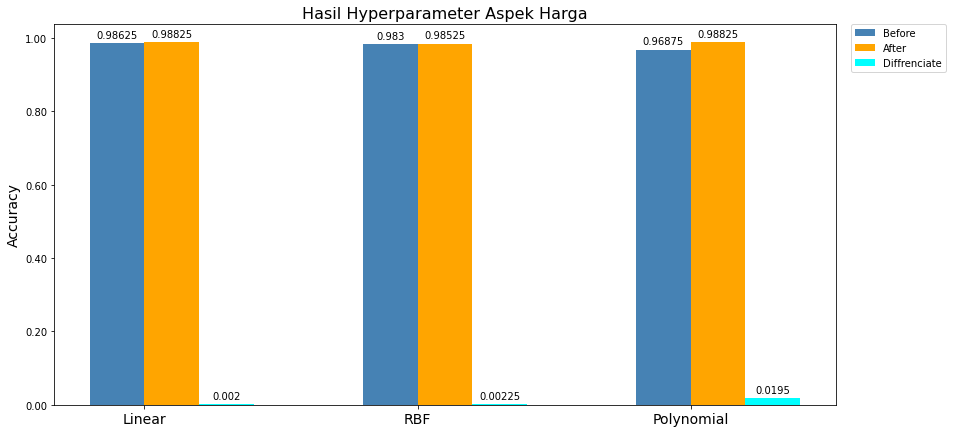

In [19]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Aspek Harga', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)
    
plt.show()

## Model Validation

### Model Validation Hyperparameter Tuning Test Dataset

* Linear Kernel

In [20]:
grid_predictions = model_looks_linear_HT.predict(x_harga_test_vectorized)

print("F1-SCORE ",f1(y_harga_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_harga_test,grid_predictions) * 100)
print("PRECISION ",prec(y_harga_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_harga_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_harga_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_harga_test, grid_predictions))

F1-SCORE  88.19112125450931
ACCURACY  98.9
PRECISION  92.45665417057168
RECALL 85.19871155813945
Confusion Matrix : 
 [[700   5   1]
 [  2 285   0]
 [  2   1   4]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       706
           0       0.98      0.99      0.99       287
           1       0.80      0.57      0.67         7

    accuracy                           0.99      1000
   macro avg       0.92      0.85      0.88      1000
weighted avg       0.99      0.99      0.99      1000



* Poly Kernel

In [21]:
grid_predictions = model_looks_poly_HT.predict(x_harga_test_vectorized)

print("F1-SCORE ",f1(y_harga_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_harga_test,grid_predictions) * 100)
print("PRECISION ",prec(y_harga_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_harga_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_harga_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_harga_test, grid_predictions))

F1-SCORE  88.19112125450931
ACCURACY  98.9
PRECISION  92.45665417057168
RECALL 85.19871155813945
Confusion Matrix : 
 [[700   5   1]
 [  2 285   0]
 [  2   1   4]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       706
           0       0.98      0.99      0.99       287
           1       0.80      0.57      0.67         7

    accuracy                           0.99      1000
   macro avg       0.92      0.85      0.88      1000
weighted avg       0.99      0.99      0.99      1000



* RBF Kernel

In [22]:
grid_predictions = model_looks_rbf_HT.predict(x_harga_test_vectorized)

print("F1-SCORE ",f1(y_harga_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_harga_test,grid_predictions) * 100)
print("PRECISION ",prec(y_harga_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_harga_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_harga_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_harga_test, grid_predictions))

F1-SCORE  65.72150331690275
ACCURACY  98.5
PRECISION  65.242435417874
RECALL 66.2200221759401
Confusion Matrix : 
 [[699   7   0]
 [  1 286   0]
 [  3   4   0]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       706
           0       0.96      1.00      0.98       287
           1       0.00      0.00      0.00         7

    accuracy                           0.98      1000
   macro avg       0.65      0.66      0.66      1000
weighted avg       0.98      0.98      0.98      1000



### Model Validation Hyperparameter Tuning Train Dataset

* Linear Kernel

In [23]:
grid_predictions = model_looks_linear_HT.predict(x_harga_train_vectorized)

print("F1-SCORE ",f1(y_harga_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_harga_train,grid_predictions) * 100)
print("PRECISION ",prec(y_harga_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_harga_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_harga_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_harga_train, grid_predictions))

F1-SCORE  100.0
ACCURACY  100.0
PRECISION  100.0
RECALL 100.0
Confusion Matrix : 
 [[2811    0    0]
 [   0 1173    0]
 [   0    0   16]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2811
           0       1.00      1.00      1.00      1173
           1       1.00      1.00      1.00        16

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



* Poly Kernel

In [24]:
grid_predictions = model_looks_poly_HT.predict(x_harga_train_vectorized)

print("F1-SCORE ",f1(y_harga_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_harga_train,grid_predictions) * 100)
print("PRECISION ",prec(y_harga_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_harga_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_harga_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_harga_train, grid_predictions))

F1-SCORE  100.0
ACCURACY  100.0
PRECISION  100.0
RECALL 100.0
Confusion Matrix : 
 [[2811    0    0]
 [   0 1173    0]
 [   0    0   16]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2811
           0       1.00      1.00      1.00      1173
           1       1.00      1.00      1.00        16

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



* RBF Kernel

In [25]:
grid_predictions = model_looks_rbf_HT.predict(x_harga_train_vectorized)

print("F1-SCORE ",f1(y_harga_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_harga_train,grid_predictions) * 100)
print("PRECISION ",prec(y_harga_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_harga_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_harga_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_harga_train, grid_predictions))

F1-SCORE  70.05804533991687
ACCURACY  99.225
PRECISION  99.15613571390472
RECALL 68.54371019284548
Confusion Matrix : 
 [[2796   15    0]
 [   1 1172    0]
 [   0   15    1]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.99      1.00      2811
           0       0.98      1.00      0.99      1173
           1       1.00      0.06      0.12        16

    accuracy                           0.99      4000
   macro avg       0.99      0.69      0.70      4000
weighted avg       0.99      0.99      0.99      4000

